In [1]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt

In [2]:
map = "./Map/Map.shp"
dados = "../scr/casos_municipio.csv"

bahia = geopandas.read_file(map)

df = pd.read_csv(dados)
df = df.drop(columns="Unnamed: 0")
df.iloc[:, 2] = df.iloc[:, 2].astype('int')
df = df.rename(columns={df.columns[2]: "Casos"})

In [3]:
bahia["Casos"] = 0

for i in range (len(bahia)):
    for j in range (len(df)):
        if bahia.loc[i, "MUNICIPIO"] == df.loc[j, "Município"]:
            bahia.loc[i, "Casos"] = df.loc[j, "Casos"]


Plotagem automatica

In [8]:
plt.rcParams["figure.figsize"] = (20, 20)

<AxesSubplot:>

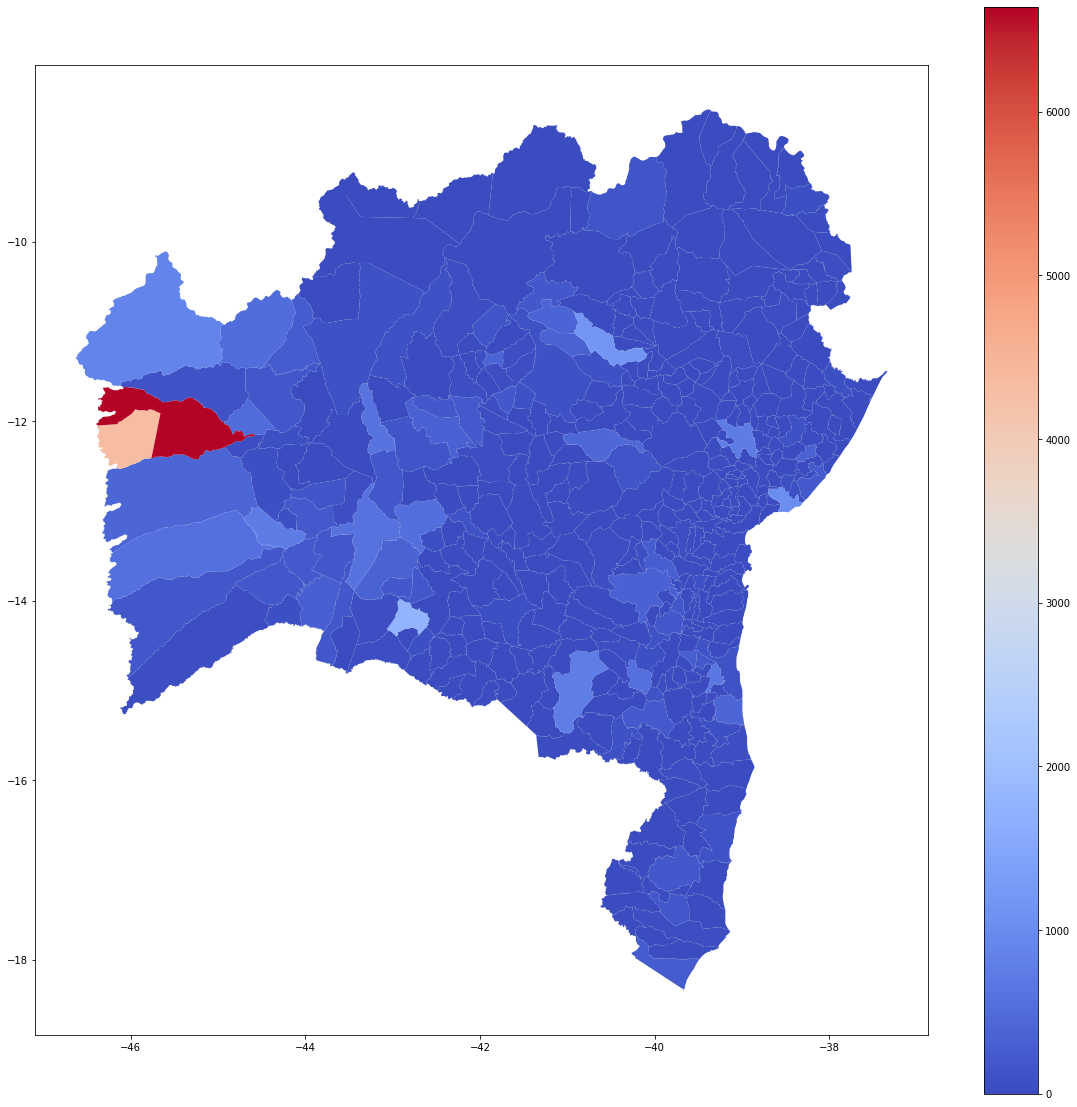

In [9]:
bahia.plot(column='Casos', cmap='coolwarm', linewidth=1, legend=True)

Plotagem baseada em quantis

<AxesSubplot:>

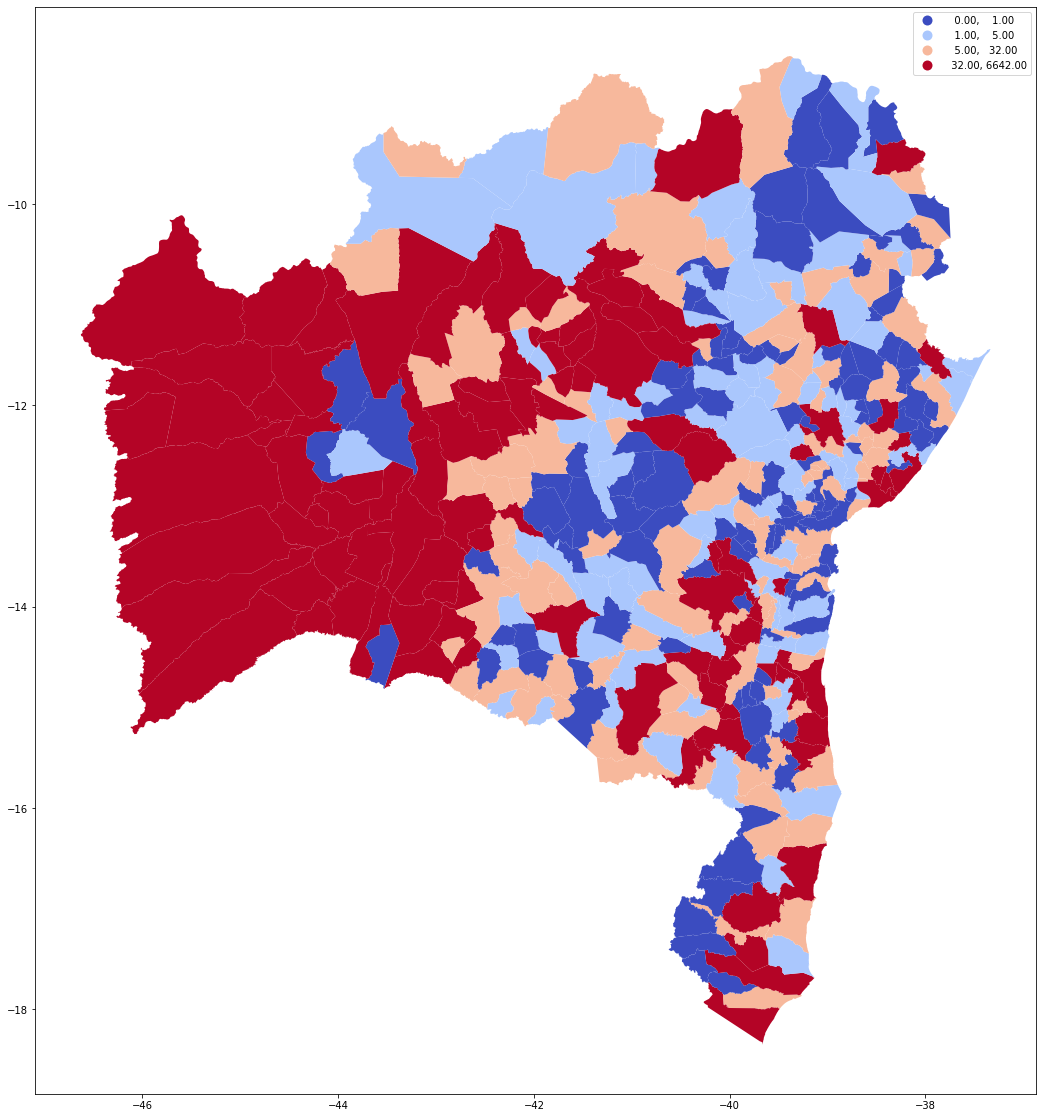

In [7]:
bahia.plot(column='Casos', scheme='quantiles', k=4, cmap='coolwarm', linewidth=1, legend=True)